# Week 2 Data Exploration Assignment
## Abigail Adams
I will be conducting data exploration on the 'Homelessness Count by Age' dataset. This data gives information on the number of people experiencing homelessness in each county in California per year, seperated by age group. The data shows counts from 2017 to 2024.

### 1.) Import Packages 
First, I am importing the 'pandas' and 'geopandas' packages because I will use them to explore this data. I am saving pandas as 'pd' and geopandas as 'gpd' to simplify the commands I run. 

In [3]:
# import the packages needed for this assignment
import pandas as pd
import geopandas as gpd

### 2.) Import Data
Next, I am importing the data that I will be using. I am telling python to: 
*  ca = name this file 'ca' 
*  pd. = use the pandas package
*  read_csv() = call in the .csv file 
* "data_wk2/ca_homelessnessCount_byAge.csv" = the file is located in the 'data_wk2' folder and titled "ca_homelessnessCount_byAge.csv"

Together, this command reads as: use the pandas package to call in a csv file that lives in a folder called 'data_wk2' and is named 'ca_homelessnessCount_byAge.csv'

In [4]:
# import the dataset I am exploring 
ca = pd.read_csv("data_wk2/ca_homelessnessCount_byAge.csv")

### 3.) Check for Successful Import / Look at Columns
Now, I will check to see if the data was sucessfully imported. To do this, I will print the data using:

* print(data.head())

With this function, I am telling Python to print the headers of my 'ca' data. This produces the header name of each column and the first 5 rows of data. The **.head()** function allows me to check if my data was sucessfully imported because the command will not run if the data was not imported correctly. While I could do this with just the **print()** function, using **.head()** minimizes the space used in the notebook. 

In [4]:
# make sure the data is imported
# also see the column names
print(ca.head())

   _id  CALENDAR_YEAR LOCATION_ID    LOCATION AGE_GROUP_PUBLIC  \
0    1           2017         All  California            18-24   
1    2           2017         All  California            25-34   
2    3           2017         All  California            35-44   
3    4           2017         All  California            45-54   
4    5           2017         All  California            55-64   

  EXPERIENCING_HOMELESSNESS_CNT  
0                         16281  
1                         27977  
2                         25195  
3                         26820  
4                         23401  


The output of this code tells us that the dataframe has 6 columns. The column names are: _id, CALENDAR_YEAR, LOCATION_ID, AGE_GROUP_PUBLIC, and EXPERIENCING_HOMELESSNESS_CNT.  

The column names tell us what kind of information the dataframe is collecting. For instance, without any background information from the dataframe's source, we cna infer that 'CALENDAR_YEAR' tells us which year the homelessness count was conducted. 

### 4.) Data Dimensions 
After successfully importing my data, I will be using the **'.shape'** function to get the dimensions of the dataframe. The output will tell me how many rows and columns the dataframe has, formatted as (row, column). This is important because it gives me insights about the size of the dataframe and an idea of how many variables there are.

In [6]:
# look at the dimensions of the dataframe
ca.shape

(2976, 6)

The data frame has 2976 rows and 6 columns.

### 5.) Info
To look deeper in the dataframe's values, I will be using the **.info** function. This will print the first and last 5 rows of the dataframe.

In [8]:
# print information about the dataframe
ca.info

<bound method DataFrame.info of        _id  CALENDAR_YEAR LOCATION_ID                    LOCATION  \
0        1           2017         All                  California   
1        2           2017         All                  California   
2        3           2017         All                  California   
3        4           2017         All                  California   
4        5           2017         All                  California   
...    ...            ...         ...                         ...   
2971  2972           2024      CA-614  San Luis Obispo County CoC   
2972  2973           2024      CA-614  San Luis Obispo County CoC   
2973  2974           2024      CA-614  San Luis Obispo County CoC   
2974  2975           2024      CA-614  San Luis Obispo County CoC   
2975  2976           2024      CA-614  San Luis Obispo County CoC   

     AGE_GROUP_PUBLIC EXPERIENCING_HOMELESSNESS_CNT  
0               18-24                         16281  
1               25-34          

The first 5 rows give information about the statewide count per age group while the last 5 rows give information about counts in the San Luis Obispo County Coc (Continuim of Care). From this output, we know the count was conducted from 2017 to 2024, as seen in the 'CALENDAR_YEAR' column. 

### 6.)Value Counts 
Now, I will be looking into some of the variables to see how many responses each of them have. To do this, I will use the functon: 
* .value_counts()

While I could run **.value_counts** on the entire dataframe, that output would likely give a lot of information at once by showing how many times each value appears for over 2700 rows. Instead, I will exploring the 'LOCATION' variable, which tells us which location the homelessness count was recorded. This could be either California as a whole or in an individual county in California. 

In [13]:
# show count of each response in the 'location' variable
ca['LOCATION'].value_counts()

LOCATION
California                                                                 72
Santa Barbara County CoC                                                   72
San Francisco CoC                                                          71
Sacramento County CoC                                                      71
Alameda County CoC                                                         71
Los Angeles County CoC                                                     71
San Diego County CoC                                                       71
Fresno, Madera Counties CoC                                                71
Ventura County CoC                                                         71
Monterey, San Benito Counties CoC                                          71
San Joaquin County CoC                                                     70
Shasta, Siskiyou, Lassen, Plumas, Del Norte, Modoc, Sierra Counties CoC    70
Humboldt County CoC                                    

This output shows how many counts there were per county in the entire dataframe. These counts are high because for each year, there are 7 age ranges that are counted. If we multiply 7 potential counts x 8 years of surveyed, the number of occurances per location makes sense.  

### 6.) Filtering
Now, I will be filtering the dataframe to look at a subset of the data. I only want to see counts from 2023 and in the Riverside County CoC. So, I will filter for these values using: 
* .query()
* EXAMPLE: example_data.query('variable == value') This tells python to go into the dataframe and ony show rows that have the variable response I want

Because I am filtering for two variables, I will be using the '&' operator. This tells python to only show me rows that are both in the Riverside County CoC and in the year 2023. I am naming this object 'ca2023_riverside'

In [5]:
# filter for only "Riverside County CoC" and counts in 2023 
ca2023_riverside = ca.query("CALENDAR_YEAR == 2023 & LOCATION == 'Riverside County CoC'")


# check dimensions of ca_homelessnessCount_byAge
ca2023_riverside.shape

# print ca2023_riverside
ca2023_riverside.sample

<bound method NDFrame.sample of        _id  CALENDAR_YEAR LOCATION_ID              LOCATION AGE_GROUP_PUBLIC  \
2568  2569           2023      CA-608  Riverside County CoC            18-24   
2569  2570           2023      CA-608  Riverside County CoC            25-34   
2570  2571           2023      CA-608  Riverside County CoC            35-44   
2571  2572           2023      CA-608  Riverside County CoC            45-54   
2572  2573           2023      CA-608  Riverside County CoC            55-64   
2573  2574           2023      CA-608  Riverside County CoC              65+   
2574  2575           2023      CA-608  Riverside County CoC          Invalid   
2575  2576           2023      CA-608  Riverside County CoC         Under 18   
2576  2577           2023      CA-608  Riverside County CoC          Unknown   

     EXPERIENCING_HOMELESSNESS_CNT  
2568                           816  
2569                          2280  
2570                          2291  
2571               

The output shows me that there were 9 counts per age group done in Riverside County in 2023. The age count with the highest count of individuals experiencing homelessness is 'Under 18', or children, at 3007 individuals. There are two age group categories that represent missing or unknown ages of individuals, which are 'Invalid' and 'Unknown', respectively. 

### 7.) Plotting
Here, I will make a bar graph that shows the counts of people experiencing homelessness per age group in the Riverside County Coc.

#### a.) Data type
First, I will look at the type of values in each column to see which type of visualization would be best suited. 

In [15]:
# look at data types
ca2023_riverside.dtypes

_id                               int64
CALENDAR_YEAR                     int64
LOCATION_ID                      object
LOCATION                         object
AGE_GROUP_PUBLIC                 object
EXPERIENCING_HOMELESSNESS_CNT    object
dtype: object

This output shows us that there is a mix of data types in our dataframe. Both '_id' and 'CALENDAR-YEAR' hvae integer values, which means the values are whole nunmbers without fractions or decimals. This makes sense because the '_id' column lists the number of counts conducted and the 'CALENDAR_YEAR' column lists the year in which the count was conducted, both of which should be whole numbers. 

'LOCATION_ID', 'LOCATION', 'AGE_GROUP_PUBLIC', and 'EXPERIENCING_HOMELESSNESS_CNT' are all objects, which means the values are text or a mix of numbers and text. This makes sense becasue all of the values contain a mix of numeric values and text. 

While it seems like 'EXPERIENCING_HOMELESSNESS_CNT' should hvae integer values, we can see from our data sample that the count in the 'Invalid' age range is *, which is not a numeric value and changes the data type for the whole column. 

#### b.) Change Data Type to Numeric 
In order to graph 'EXPERIENCING_HOMELESSNESS_CNT' on a bar chart, the data needs to be numeric. To change the data type, I would need to remove the '*' value for the 'Invalid' age group category. To do this, I will start by making a copy of the dataframe I am working with to ensure I do not alter the original.

Then, I will replace the '*' value with NaN, which means Not a Number, if it cannot be replaced with a number. I also tell python to drop all Nan values from dataframe to prevent Python from givng me an error code from not plotting nueric data. Basically, I am telling python to:
* Go within the 'ca2023_riverside_int' data frame, -> ca2023_riverside_int
  
* Go into the 'EXPERIENCING_HOMELESSNESS_CNT' variable -> ['EXPERIENCING_HOMELESSNESS_CNT']

* Change the data type of 'EXPERIENCING_HOMELESSNESS_CNT' to numeric (integers) -> pd.to_numeric(ca2023_riverside_int['EXPERIENCING_HOMELESSNESS_CNT']

* Do this by converting values of '*' into integers -> replace('*', pd.NA)

  
* If the values cannot be converted into integers, replace them with NaN - > errors='coerce'
  

In [21]:
# make a copy of dataframe to  make edits
ca2023_riverside_int = ca2023_riverside.copy()

# replace string value (*) to NaN and convert data type to int 
ca2023_riverside_int['EXPERIENCING_HOMELESSNESS_CNT'] = pd.to_numeric(
    ca2023_riverside_int['EXPERIENCING_HOMELESSNESS_CNT'].replace('*', pd.NA), errors='coerce'
)

#### c.) Drop NaN value
Now, I am going to drop the Nan value from the dataframe so that it will be coded as numeric and able to be plotted on a bar graph. 

In [ ]:
# Drop NaN value
ca2023_riverside_int_trimmed = ca2023_riverside_int.dropna(subset=['EXPERIENCING_HOMELESSNESS_CNT'])

#### d.) Rename Columns
Before we graph, I am going to rename the columns to make easier the read on the graph. 

In [28]:
# rename columns used in graph, homenessless count and age group 
ca2023_riverside_int_trimmed1 = ca2023_riverside_int_trimmed.rename(columns={
    'AGE_GROUP_PUBLIC': 'Age Group',
    'EXPERIENCING_HOMELESSNESS_CNT': 'Homelessness Count'
})

#### e.) Plot (FINALLY!)
Now, I am going to plot the data as a bar chart using .plot. 

<Axes: title={'center': 'Homelessness Count by Age Group in Riverside County 2023'}, xlabel='Age Group'>

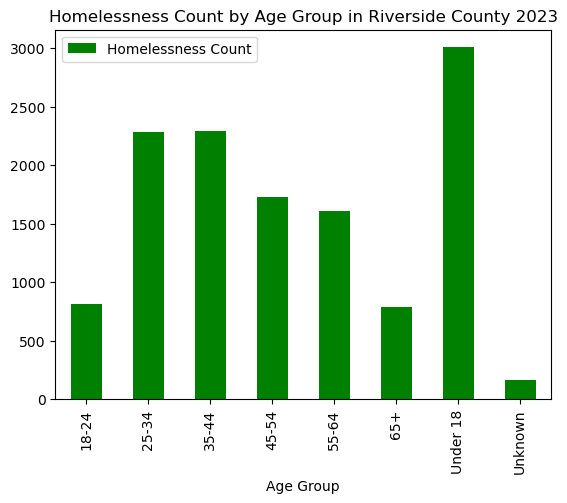

In [30]:
# create bar graph
ca2023_riverside_int_trimmed1.plot(
    x='Age Group', # use this variable on x axis 
    y='Homelessness Count', # use this variable on y axis
    kind='bar', # make a bar chart
    title='Homelessness Count by Age Group in Riverside County 2023', # add a title
    color='green' # make bars green
)